# WeatherPy
----

### Analysis
* No surprise, it gets warmer the closer to the equator, or latitude 0, that a city is. It should be noted that a northern city is more likely to have colder temps than a southern city. 
* Latitude and cloudiness have no correllation, as indicated by the graph, although there was a farily even distribution of cloudiness.
* It appears that the majority of cities were considered highly humid, regardless of latitude distribution. 

---

#### Note
* Elizabeth helped me (tremendously) with the API section of the hw. I used her method to get my list of cities and variables. I changed my variable names, but our results should be fairly similar. Please let me know if there is an issue with this. 

In [ ]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)
# cities_df =pd.DataFrame(cities, columns=["City"])
# cities_df.head()

['fortuna', 'san quintin', 'castro', 'ushuaia', 'iqaluit', 'tawzar', 'tuktoyaktuk', 'dawson creek', 'port hardy', 'grand gaube', 'albany', 'tilichiki', 'alvorada', 'saskylakh', 'dingle', 'altena', 'norman wells', 'synya', 'longyearbyen', 'bredasdorp', 'hilo', 'new norfolk', 'busselton', 'meadow lake', 'vaini', 'illoqqortoormiut', 'cape town', 'rikitea', 'oistins', 'punta arenas', 'araouane', 'babanusah', 'usagara', 'port alfred', 'kapaa', 'kilifi', 'huarmey', 'mar del plata', 'tessalit', 'carinhanha', 'sanmenxia', 'pineville', 'urfa', 'ahipara', 'rudbar', 'san cristobal', 'jamestown', 'chuy', 'curup', 'avarua', 'cockburn town', 'portage', 'viligili', 'bud', 'juifang', 'terney', 'tuatapere', 'vardo', 'esso', 'inhambane', 'torbay', 'kampot', 'mataura', 'kodiak', 'belushya guba', 'qaanaaq', 'novikovo', 'monticello', 'quesnel', 'nanortalik', 'thompson', 'saint-philippe', 'bengkulu', 'kadykchan', 'bethel', 'mahebourg', 'lebu', 'port blair', 'chicama', 'saldanha', 'wageningen', 'astoria', 'k

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
#url call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
row_count = 1
units = "Imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


In [15]:
#Name variables, give them blank lists
citylist =[]
clouds=[]
country=[]
date_time=[]
humidity=[]
lat=[]
lon=[]
max_temp=[]
min_temp=[]
wind_speed=[]

#Begin compiling data
print("Beginning Data Retrieval")
print("---------------------------------")

for city in cities:
    try:
        print(f"Processing Record {row_count} | {city}")
        city_data= requests.get(query_url + city).json()
        citylist.append(city_data["name"])
        clouds.append(city_data["clouds"]["all"])
        country.append(city_data["sys"]["country"])
        date_time.append(city_data["dt"])
        humidity.append(city_data["main"]["humidity"])
        lat.append(city_data["coord"]["lat"])
        lon.append(city_data["coord"]["lon"])
        max_temp.append(city_data["main"]["temp_max"])
        min_temp.append(city_data["main"]["temp_min"])
        wind_speed.append(city_data["wind"]["speed"])
    except (KeyError, IndexError):
        print(f"City not found. Skipping...")
    finally:
        if row_count < 550:   
            row_count = row_count+1
        else:
            break


Beginning Data Retrieval
---------------------------------
Processing Record 1 | fortuna
Processing Record 2 | san quintin
Processing Record 3 | castro
Processing Record 4 | ushuaia
Processing Record 5 | iqaluit
Processing Record 6 | tawzar
City not found. Skipping...
Processing Record 7 | tuktoyaktuk
Processing Record 8 | dawson creek
Processing Record 9 | port hardy
Processing Record 10 | grand gaube
Processing Record 11 | albany
Processing Record 12 | tilichiki
Processing Record 13 | alvorada
Processing Record 14 | saskylakh
Processing Record 15 | dingle
Processing Record 16 | altena
Processing Record 17 | norman wells
Processing Record 18 | synya
Processing Record 19 | longyearbyen
Processing Record 20 | bredasdorp
Processing Record 21 | hilo
Processing Record 22 | new norfolk
Processing Record 23 | busselton
Processing Record 24 | meadow lake
Processing Record 25 | vaini
Processing Record 26 | illoqqortoormiut
City not found. Skipping...
Processing Record 27 | cape town
Processing

Processing Record 232 | namatanai
Processing Record 233 | ambilobe
Processing Record 234 | saint-augustin
Processing Record 235 | sentyabrskiy
City not found. Skipping...
Processing Record 236 | itarema
Processing Record 237 | ribeira grande
Processing Record 238 | ilulissat
Processing Record 239 | colwyn bay
Processing Record 240 | coihaique
Processing Record 241 | alofi
Processing Record 242 | touros
Processing Record 243 | black river
Processing Record 244 | platteville
Processing Record 245 | severo-kurilsk
Processing Record 246 | guymon
Processing Record 247 | ambah
Processing Record 248 | antofagasta
Processing Record 249 | mount gambier
Processing Record 250 | codrington
Processing Record 251 | utete
Processing Record 252 | georgetown
Processing Record 253 | bemidji
Processing Record 254 | nizhneyansk
City not found. Skipping...
Processing Record 255 | tanout
Processing Record 256 | nkhotakota
Processing Record 257 | kuryk
Processing Record 258 | katobu
Processing Record 259 | c

Processing Record 454 | gaozhou
Processing Record 455 | rodrigues alves
Processing Record 456 | hofn
Processing Record 457 | lompoc
Processing Record 458 | marsh harbour
Processing Record 459 | ruatoria
City not found. Skipping...
Processing Record 460 | clyde river
Processing Record 461 | attawapiskat
City not found. Skipping...
Processing Record 462 | kargil
Processing Record 463 | tomigusuku
Processing Record 464 | kincardine
Processing Record 465 | birao
Processing Record 466 | havre-saint-pierre
Processing Record 467 | carahue
Processing Record 468 | grand river south east
City not found. Skipping...
Processing Record 469 | souillac
Processing Record 470 | wagar
Processing Record 471 | port macquarie
Processing Record 472 | palatka
Processing Record 473 | phangnga
Processing Record 474 | mergui
City not found. Skipping...
Processing Record 475 | verkhoyansk
Processing Record 476 | ceres
Processing Record 477 | aden
Processing Record 478 | tukrah
City not found. Skipping...
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#Compile Data Frame
weather_categories ={
    "City" : citylist,
    "Country" : country,
    "Date/Time" : date_time,
    "Latitude" : lat,
    "Longitude" : lon,
    "Maximum Temp" : max_temp,
    "Minimum Temp" : min_temp,
    "Cloudiness" : clouds,
    "Humidity"  : humidity,
    "Wind Speed" : wind_speed
}
weather_df = pd.DataFrame(weather_categories)
#convert to a "normal" date/time
weather_df["Date/Time"] = pd.to_datetime(weather_df["Date/Time"], unit = "s")
#output df to csv
weather_df.to_csv("../Output/weather_df.csv", encoding="utf-8", index=False)
#And here it is
weather_df.head()


,City,Country,Date/Time,Latitude,Longitude,Maximum Temp,Minimum Temp,Cloudiness,Humidity,Wind Speed
0,Fortuna,ES,2018-10-23 15:00:00,38.18,-1.13,71.60,69.80,20,77,4.70
1,San Quintin,PH,2018-10-23 15:00:00,17.54,120.52,77.00,77.00,20,83,2.24
2,Castro,CL,2018-10-23 15:19:13,-42.48,-73.76,60.67,60.67,0,69,3.15
3,Ushuaia,AR,2018-10-23 14:00:00,-54.81,-68.31,44.60,44.60,40,73,25.28
4,Iqaluit,CA,2018-10-23 15:00:00,63.75,-68.52,19.40,19.40,75,73,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

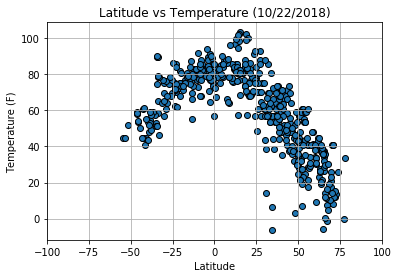

In [17]:
plt.scatter(lat, max_temp, marker="o", edgecolors= "black" )
plt.title("Latitude vs Temperature (10/22/2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.xlim(-100, 100)

#saving img
plt.savefig("../Images/Lat vs Temp.png")
#show
plt.show()

#### Latitude vs. Humidity Plot

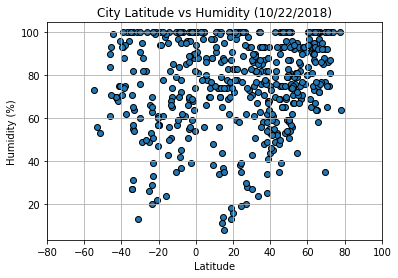

In [18]:
plt.scatter(lat, humidity, marker="o", edgecolors= "black")
plt.title("City Latitude vs Humidity (10/22/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.xlim(-80, 100)

#saving img
plt.savefig("../Images/Lat vs Humidity.png")
#show
plt.show()

#### Latitude vs. Cloudiness Plot

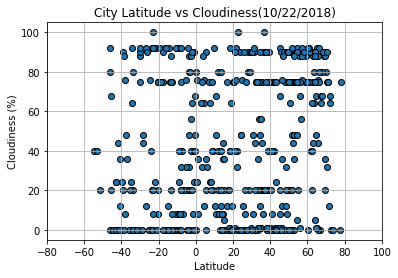

In [19]:
plt.scatter(lat, clouds, marker="o", edgecolors="black")
plt.title("City Latitude vs Cloudiness(10/22/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.xlim(-80,100)
#saving img
plt.savefig("../Images/Lat vs Cloudiness.png")
#show
plt.show()

#### Latitude vs. Wind Speed Plot

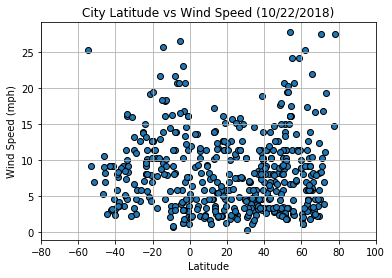

In [20]:
plt.scatter(lat, wind_speed, marker="o", edgecolors="black")
plt.title("City Latitude vs Wind Speed (10/22/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.xlim(-80,100)
#saving img
plt.savefig("../Images/Lat vs Wind Speed.png")
#show
plt.show()